In [1]:
import numpy as np
import torch 
import pickle
import os
import matplotlib.pyplot as plt
import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.utils.utils_load as load
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data as data
from pathlib import Path

In [2]:
path = !pwd
path = Path(path[0])
path_utils = path/'../utils'
path_figures = path/'figures'
path_configs = path/'configs_parameter_search'
path_optimize_parameters = path_utils/'optimize_parameters.py'
path_logs = path/'.logs'
path_root = path/'../../'

In [3]:
path

PosixPath('/sequoia/data1/umarteau/Experiments/NIPS2020final/nips_2020_non_negative_model_for_non_negative_functions/npm_nnf/density_estimation')

In [4]:
def plot(a,b,n_plot=10000,save_path = path_figures,ds = None,clf = None,fig_file = None,ymin = -0.1,ymax = 0.8):
    n = n_plot//3
    d = ds.X.size(1)
    
    x1 = (b-a)*(2*torch.rand((n,d))-1)/2
    x1[:,0]+= (a+b)/2 
    x2 = ds.sample_from_density(n)
    x3 = torch.zeros((n,d))
    x3[:,0] = (b-a)*(2*torch.rand(n)-1)/2 + (a+b)/2
    xtest = torch.cat([x1,x2,x3],0)
    ytest = clf.predict(xtest)
    xtest_plot = xtest[:,0]

    #print((ytest < 0).sum())
    #print(ytest.sum()*(2*rad)*(2*rad2)**(d-1)/ntest)
    x_train = ds.X
    y_train = clf.predict(x_train)
    
    x_density = torch.zeros((n,d))
    x_density[:,0] = torch.linspace(a,b,n)
    y_density = ds.apply_density(x_density)
    x_density_plot = x_density[:,0]



    fig = plt.figure()
    plt.scatter(xtest_plot,ytest,lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
    plt.plot(x_density_plot,y_density,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
    #plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
    #plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
    plt.legend()
    plt.xlabel("x",fontsize = 20)
    plt.ylabel("p(x)",fontsize = 20)
    plt.ylim(ymin = ymin,ymax = ymax)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()
    if isinstance(fig_file,str):
        fig.savefig(open(os.path.join(save_path,fig_file),'wb') , format='pdf', dpi=1000)
    plt.show()
def score(clf,ds,n = 1000):
    x_test = ds.sample_from_density(n)
    return clf.score(x_test)

# Our method

In [5]:
name = '10d_our_method'

In [6]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [7]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [ ]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

## Loading the estimator 

In [7]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:13:58,702  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:13:58,752  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:13:58,753  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


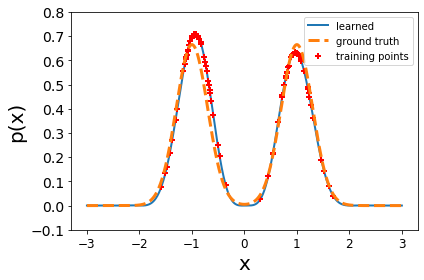

In [12]:
plot(-3,3,fig_file = fig_file,clf = clf,ds = ds)

## Performance

In [13]:
score(clf,ds,n=100000)

tensor(-0.9125)

# Linear method

In [12]:
name = '10d_linear_method'

In [13]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [14]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [6]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

## Loading the estimator 

In [15]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:29:29,202  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:29:29,299  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:29:29,299  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


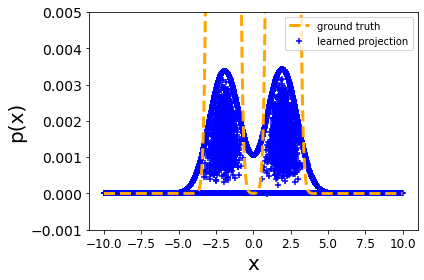

In [17]:
plot(-10,10,fig_file = fig_file,clf = clf,ds = ds,ymin = -0.001,ymax = 0.005)

## Performance

In [18]:
score(clf,ds,n=100000)

tensor(-6.4976)

# NCM method

In [19]:
name = '10d_nw_method'

In [20]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [21]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [22]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

^C


## Loading the estimator 

In [23]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:29:52,931  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:29:52,992  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:29:52,993  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


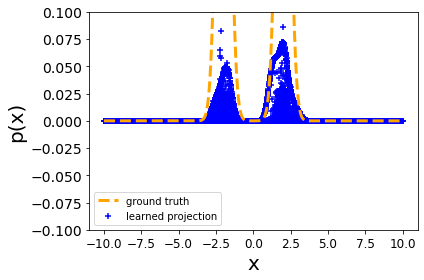

In [24]:
plot(-10,10,fig_file = fig_file,clf = clf,ds = ds,ymax = 0.1)

## Performance

In [25]:
score(clf,ds,n=100000)

tensor(-7.3500)

# GLM method

In [26]:
name = '10d_glm_method'

In [27]:
config_file = f'config_{name}.json'
log_file = f'log_{name}'
fig_file = f'{name}.pdf'

In [28]:
#Paths
path_config_file = path_configs/config_file

## Creating the estimator 

In [6]:
path_log_file = path_logs/log_file
!python {path_optimize_parameters} -r {path_root} -c {path_config_file} &> {path_log_file}

## Loading the estimator 

In [29]:
clf,ds = load.load(path_config_file,root_path = path_root)

## Visualisation 

2020-11-24 14:30:10,672  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-11-24 14:30:10,737  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-11-24 14:30:10,738  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


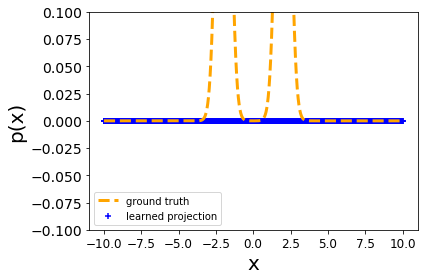

In [30]:
plot(-10,10,fig_file = fig_file,clf = clf,ds = ds,ymax = 0.1)

## Performance

In [16]:
score(clf,ds,n=100000)

tensor(-7.3632)